# SQL PROBLEMS

### Problem 1 (Level 1)

Students:<Id, Marks> 

Find the Second highest marks 

In [ ]:
SELECT distinct Marks 
FROM Students 
ORDER BY Marks DESC
LIMIT 1 OFFSET 1;

#### Alternative approach

In [ ]:
SELECT max(Marks) 
FROM Students 
WHERE Marks < (SELECT max(Marks) FROM Students)

### Problem 2 (Level 2)

Points: <x, y> 

(Here x and y represents the x and y co-ordinates of the points) 

Find the shortest distance between any two points in the table. 

In [ ]:
SELECT MIN(SQRT(POW(p1.x - p2.x, 2) + POW(p1.y - p2.y, 2))) 
FROM Points p1, Points p2
WHERE p1.x != p2.x OR p1.y != p2.y

#### Alternative approach

(This is a somewhat optimized as compared to the previous)

In [ ]:
SELECT SQRT(MIN(POW(p1.x - p2.x, 2) + POW(p1.y - p2.y, 2))) 
FROM Points p1, Points p2
WHERE p1.x != p2.x OR p1.y != p2.y

When we use 'OR', if either of the statement on the left or right side evaluates True then the whole expression is True. 
Consider points -  (4, 3), (4, 1). Here the p1.x != p2.x is not True, but p1.y ! = p2.y is True, so the distance will get computed. 
Likewise, for the points (1, 5), (3, 5), the  p1.x != p2.x  is True, but  p1.y ! = p2.y is not True, so the distance will still get computed.

### Problem 3 (Level 2)

Orders: <Cust, Item, date> 

Select Customers who purchased atleast 2 different items on 2 different dates.

In [ ]:
SELECT Cust 
FROM Orders 
GROUP BY Cust
HAVING COUNT(DISTINCT Item) >= 2
AND COUNT(DISTINCT date) >= 2

### Problem 4 (Level 2)

Scores: <player, country, goals>

Find Players who scored more goals than every Spanish player and more than at least one German player.

In [ ]:
SELECT s.player
FROM Scores s
WHERE s.goals > ALL(SELECT s1.goals 
                    FROM Scores s1 
                    WHERE s1.country = 'Spain')
AND s.goals > ANY(SELECT s2.goals 
                  FROM Scores 
                  WHERE s2.country = 'Germany')

### Problem 5 (Level 3)

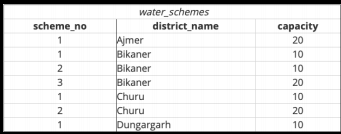

water_schemes: <scheme_no, district_name, capacity>

Print name of districts whose total capacity >= average capacity of every district.


In [ ]:
# subquery refactoring
WITH(name, capacity) as
SELECT district_name, SUM(capacity)
FROM water_schemes
GROUP BY district_name
WITH total_avg(capacity) as
SELECT AVG(capacity)
FROM total
SELECT name 
FROM total, total_avg
WHERE total.capacity >= total_avg.capacity

#### Alternative solution

In [ ]:
SELECT district_name
FROM water_schemes
GROUP BY district_name 
HAVING SUM(capacity) >= ALL(SELECT AVG(capacity)
                           FROM water_schemes 
                           GROUP BY district_name)

#### SOME TIPS:

* Break the complex problem into sub-problems.


* Try to solve a problem from inner to outer approach i.e. First try to build the inner-query and then outer. 